# <u> <b> Tutorial: Quick, Custom, and Helpful Functions </b> </u>
## Author: Christopher W. Smith

Unfinished, Updated:10/13/2020


linkdin: www.linkedin.com/in/christopher-w-smith022

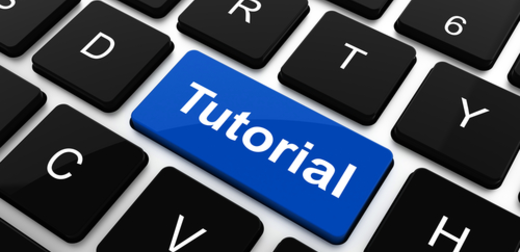

# Welcome to the kernel
I decided to make this kernel as I found making functions for reptiotious tasks to be a little difficult when begining.
# Introduction
For beginners, working on cleaning and exploring data can get very annoying having to repitiously utilize several lines of code. Ways to come around those is by using functions. Functions allow us to call many parameters/lines of code in a single command. This kernel will look at a function used to clean data and then used the clean data for exploratory data analysis. Furthermore, I will then apply this to an ML method using both functions for cleaning and brief EDA. I will then apply functions for machine learning search parameterization and confusion matrices. The overall idea of using custom functions is to reduce the amount of code for repitious tasks. As well as for implementation in multiple notebooks.

I hope any one at any skill of python can find something to take away from this. If not please leave a comment. If you use any of these functions please add this notebook url reference it in the red brackets within the function. Sometimes others want to see a source.

Disclaimer: These functions provided here were done by myself. These may not be the most efficient approaches to problems but they are an approach.

# Importing Releavant Libraries

In [ ]:
!pip install seaborn --upgrade #Update Seaborn for Plotting

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno #Visualize null

#Plotting Functions
import matplotlib.pyplot as plt

#Aesthetics
import seaborn as sns
sns.set_style('ticks') #No grid with ticks
print(sns.__version__)

# All Data Import

In [ ]:
#Data Import
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Data Cleaning Function
The data I chose to demonstrate this functon is from the income dataset for binary classification (https://www.kaggle.com/mastmustu/income). This data set offers a vast array of features that have null values and several values per feature that we can consolidate with the function.

In [ ]:
income=pd.read_csv('/kaggle/input/income/train.csv')
income.head()

First, importing the data, we see that there are 9 categroical values, 5 integers and the target column of income_>50K. To find out if we have missing values below we can us the missingo bar() function.

In [ ]:
income.info()
msno.bar(income)

Both the info and bar functions provide information for missing null values for each feature in the data frame. There is a total of 43,957 rows and the features workclass and occupation are missing so data values. These missing values are marked as null and can harm a machine learning algorithm later. To fix this we can clean the data. However, before we clean the data, lets take a look at all of the unique values of our categorical data.

In [ ]:
#Generating column labels in data frame for simple copy paste
income.columns

In [ ]:
#Using a for loop we can print each unique value per column.
col_list=['workclass','education','marital-status', 'occupation','relationship', 'race', 'gender','native-country']
for label in col_list:
    print('***',label, income[label].unique()) #*** are used for indentation

As we can see, each feature contains multiple values. Though these look nice for if you are considering of implementing an algorithm, these may be too much. So we will clean the data through two ways: 
* The first way is by looking at each feature manually and filling in the data with several lines of code (this will look ugly)
* The second way will be to use a predefined function to do the same job.

In [ ]:
new_train=income.copy()#Setting a check point for errors. This is good practice for when manipulating values on data frames through multiple code blocks

#Renaming income for simple input
new_train.rename(columns={'income_>50K':'income'}, inplace=True)

#workclass
new_train['workclass'].fillna('nan', inplace=True)#First replace the null value with a 'nan' as part of that column contains them already. The .fillna function replaces nulls with whatever string label you want
new_train['workclass']=new_train['workclass'].replace({'Self-emp-not-inc':'Self-emp','Self-emp-inc':'Self-emp',
        'Never-worked':'Un-emp/Unk','Without-pay':'Un-emp/Unk', 'State-gov':'Government', 
        'Federal-gov':'Government','Local-gov':'Government','nan':'Un-emp/Unk'}) #This first line is a harsh way of doing this and is very tedious.

"""Looking below we can abbreviate this through several for loops using the replace function. Setting a list of 
variables that you want to converge to a single variable as seen below. Once a list is made you can implement 
it into the for loop and place the pulled values to be replaced by a specific value (pull label:new label)"""

#Education
edu_lHS=['12th','7th-8th','9th','10th', '11th','5th-6th','1st-4th','Preschool'] # <HS
edu_assoc=['Assoc-voc','Assoc-acdm','Some-college'] #Associate
edu_mpro=['Masters','Prof-school']#Mas-Pro
for edu in edu_lHS:
    new_train['education']=new_train['education'].replace({edu:'<HS'})
for edu in edu_assoc:
    new_train['education']=new_train['education'].replace({edu:'Associate'})
for edu in edu_mpro:
    new_train['education']=new_train['education'].replace({edu:'Mas-Pro'})

#Marital Status
sep_div=['Divorced','Separated']#Sep-Div
married=['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse']#Married
for mar in sep_div:
    new_train['marital-status']=new_train['marital-status'].replace({mar:'Sep-Div'})
for mar in married:
    new_train['marital-status']=new_train['marital-status'].replace({mar:'Married'})

#Occupation
new_train['occupation'].fillna('nan', inplace=True)

#Relationship: 
marr=['Husband', 'Wife']#Married
for mar in marr:
    new_train['relationship']=new_train['relationship'].replace({mar:'Married'})

#Native Country
europe=['England', 'Italty', 'Germany', 'France','Yugoslavia', 'Poland', 'Greece', 'Ireland', 'Scotland',
       'Hungary','Holand-Netherlands','Portugal']
asia=['China', 'Philippines','Vietnam','Thailand','Taiwan','Laos','Cambodia','Japan', 'Hong','India','Iran']
caribbean=['Jamaica','Dominican-Republic','Cuba','Haiti','Trinadad&Tobago', 'Puerto-Rico']
n_america=['United-States','Canada']
c_america=['Mexico','Honduras','El-Salvador','Guatemala','Nicaragua']
s_america=['Columbia','Ecuador','Peru']
for coun in europe:
    new_train['native-country']=new_train['native-country'].replace({coun:'Europe'})
for coun in asia:
    new_train['native-country']=new_train['native-country'].replace({coun:'Asia'})
for coun in caribbean:
    new_train['native-country']=new_train['native-country'].replace({coun:'Carribean'})
for coun in n_america:
    new_train['native-country']=new_train['native-country'].replace({coun:'N.America'})
for coun in c_america:
    new_train['native-country']=new_train['native-country'].replace({coun:'C.America'})
for coun in s_america:
    new_train['native-country']=new_train['native-country'].replace({coun:'S.America'})
new_train['native-country'].fillna('nan', inplace=True)
new_train['native-country']=new_train['native-country'].replace({'South':'nan'})#As we do not know what south is we will just convert it to nan

#Once we are done we can look that we replaced all the null values for either 'nan' or something else
new_income=new_train.copy()# Train was a fragment of a previous notebook I was working on and did not want to replace it for every line.
new_income.info()
for label in col_list:
    print(label, new_income[label].unique())
new_income.head()

As we can see we successfull filled every null value and condensed the number of values per column. However, that line of code was pretty ugly and can be summarized in a function. Lets look at how we can turn this into a function.

In [ ]:
def cleaner(data,column, group_by=False, category=None, score=None,  
            old_label1=None, new_label1=None, old_label2=None , new_label2=None, 
            old_label3=None, new_label3=None, old_label4=None, new_label4=None, 
            old_label5=None, new_label5=None, old_label6=None,new_label6=None):
    
    """ Quick helper function to make data cleaning faster and require less lines 
    of code per column for replacing values. Following the code you will see that 
    old_label#=old_label#. Example (1:1 as 2:2.). This function will automatically
    fill null values as 'nan'. If you do not want 'nan' it must be specified in
    list.
    
    Inputs:
    data: pandas DataFrame
    column: 'column name' as string
    old_label: variable of a string or string list of values. default=None
    new_label: variable of a string to replace the old_label(s) with. default=None
    group_by: Groups Data by category, default=False, bool
    category: Category in DataFrame to group data by, default=None, string
    score: Transform null by string, default=None, 'mean', 'median', 'mode'
    ***Note group_by, category and score all must have a value to be used together***
    
    Output: Updated DataFrame in specified column and a print of the number of sets of strings replaced"""
    
    print('***',column,'***')
    #Null Filling
    if data[column].isnull().sum()==0:
        print('No null in', column)
    elif group_by==True:
        null=data[column].isnull().sum()
        data[column].fillna(data.groupby(category)[column].transform(score), inplace=True)
        print(column,'null filled by', score, 'of',category)
        print(null, 'null values filled in', column)
    else:
        null=data[column].isnull().sum()
        data[column].fillna('nan', inplace=True)
        print(null, 'null values filled in', column)
        
    #First set of labels
    if old_label1==None:
        return print('No label replacements made!')
    else:
        for old in old_label1:
            new_data=data[column].replace({old:new_label1}, inplace=True)
            x=1
    
    #Second set of labels
    if old_label2==None:
        return print(x, 'set of labels were replaced in',column)
    else:
        for old in old_label2:
            new_data=data[column].replace({old:new_label2}, inplace=True)
            x2=x+1
    
    #Third set of labels        
    if old_label3==None:
        return print(x2, 'set of labels were replaced in', column)
    else:
        for old in old_label3:
            new_data=data[column].replace({old:new_label3}, inplace=True)
            x3=x2+1
    
    #Fourth set of labels
    if old_label4==None:
        return  print(x3, 'set of labels were replaced in', column)
    else:
        for old in old_label4:
            new_data=data[column].replace({old:new_label4}, inplace=True)
            x4=x3+1
            
    #Fifth set of labels
    if old_label5==None:
        return print(x4, 'set of labels were replaced in', column)
    else:
        for old in old_label5:
            new_data=data[column].replace({old:new_label5}, inplace=True)
            x5=x4+1
    
    #Sixth set of labels
    if old_label6==None:
        return print(x5, 'set of labels were replaced in', column)
    else:
        for old in old_label6:
            new_data=data[column].replace({old:new_label6}, inplace=True)
            x6=x5+1
            return print(x6, 'set of labels were replaced in', column)

Though the function above is a large chunk of code, it can be universally applied to every feature in this data set. We can also monitor how many lists this function works with as it will give us a print output. The way this function works is by inserting the inputs into cleaner() as described in <span style="color:red">red text in the code chunk</span>. The function then uses the foreloops (similar to above) to replace an inserted list of values with a specific value. This function can be expanded for more but after completing each for loop it will move on to the next conditional statement of if's. If the function recognized to the default of None input then it will stop the function there (<b><span style="color:green">return</span></b>) and print the number of lists it worked with.

In [ ]:
new_income=income.copy()#Re-using new_income

#Renaming income for simple input
new_income.rename(columns={'income_>50K':'income'}, inplace=True)

#age
cleaner(new_income, 'age')

#workclass
work_self=['Self-emp-not-inc','Self-emp-inc']#Self-emp
work_unuk=['Never-worked','Without-pay','nan']#Un-emp/Unk
work_gov=['State-gov','Federal-gov','Local-gov']#Government
cleaner(new_income, 'workclass', work_self, 'Self-emp', work_unuk, 'Un-emp/Unk', work_gov, 'Government')

#Education
edu_lHS=['12th','7th-8th','9th','10th', '11th','5th-6th','1st-4th','Preschool'] # <HS
edu_assoc=['Assoc-voc','Assoc-acdm','Some-college'] #Associate
edu_mpro=['Masters','Prof-school']#Mas-Pro
cleaner(new_income, 'education', edu_lHS, '<HS', edu_assoc, 'Associate', edu_mpro, 'Mas-Pro')

#Occupation
new_income['occupation'].fillna('nan', inplace=True)#We only need to fill nan here

#Marital Status
sep_div=['Divorced','Separated']#Sep-Div
married=['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse']#Married
cleaner(new_income, 'marital-status', sep_div, 'Sep-Div', married, 'Married')

#Relationship
marr=['Husband', 'Wife']#Married
cleaner(new_income, 'relationship', marr, 'Married')

#Native Country
europe=['England', 'Italty', 'Germany', 'France','Yugoslavia', 'Poland', 'Greece', 'Ireland', 'Scotland',
       'Hungary','Holand-Netherlands','Portugal']
asia=['China', 'Philippines','Vietnam','Thailand','Taiwan','Laos','Cambodia','Japan', 'Hong','India','Iran']
caribbean=['Jamaica','Dominican-Republic','Cuba','Haiti','Trinadad&Tobago', 'Puerto-Rico']
n_america=['United-States','Canada']
c_america=['Mexico','Honduras','El-Salvador','Guatemala','Nicaragua']
s_america=['Columbia','Ecuador','Peru']
cleaner(new_income, 'native-country', europe, 'Europe', asia, 'Asia', caribbean, 'Caribbean', n_america,'N.America', c_america,'C.America', s_america,'S.America')
new_income['native-country']=new_income['native-country'].replace({'South':'nan'})#As we do not know what south is we will just convert it to nan

#Checking the data
new_income.info()
for label in col_list:
    print(label, new_income[label].unique())
new_income.head()

As we can see, this function provides us with print output telling us per column in the for loop instances such as the number of null values and the number of lists that were replaced for a specified values. If we look at age the code reads that it had no null values as well as no replacements were made. This was because there was no inserted replacements and the function stoped without any label variables. This can give us a secondary confirmation that the changes did occur. By checking the info again and looking at the first few rows we see that we successfully cleaned the data. Lastly, we can print the unique values to see that we have less data. Even though that code block looks bulcky still, it is only because we set many strings to one variable. However, by using a function we can remove parameterizing several for-loops repitiously and let the function do the for loops and null insertion for us. Similarly, when implementing this to other notebooks it is a simple copy and paste of the function at the top of the notebook and it is good to go (for as long as you follow the input alignment).

# Exploratory Analysis
For this part I will use a different data set for EDA as we can observe relationships with the data while having fun with functions. The data set that will be used here will be the iris dataset. https://www.kaggle.com/uciml/iris

In [ ]:
iris=pd.read_csv('/kaggle/input/iris/Iris.csv')
iris.info()
iris.head() 

As we can see, iris has no null values and is overall numerical in features so we will not need to worry about cleaning the data at all. However, to again demonstrate the function above in how it will not make unnecessary changes we will run it through the function.

In [ ]:
cleaner(iris,'Species')
cleaner(iris,'SepalLengthCm')

## Plotting

When performing machine learning tasks it is good practice to do an EDA first to get a feel for the data. Many plot tools exist and I will be using matplotlib and seaborn for aesthetics. A common thing that I do see on Kaggle are users making the same generic plots that are boxed in and use  several lines of code. I will demonstrate the same result using several lines of code and just one function to obtain the same result. The function allows for easy consistent plotting aesthitics that can look publication ready. 
  
First lets look at the relationship between sepal length and width for all three species on a scatterplot.

In [ ]:
fig, ax=plt.subplots()# Required for ax parameterization

sns.scatterplot(data=iris, x='SepalLengthCm' ,y='SepalWidthCm', hue='Species', palette=['b','r','g'], s=30)


#Ticks
ax.tick_params(direction='out', length=5, width=3, colors='k',
               grid_color='k', grid_alpha=1,grid_linewidth=2)
plt.xticks(fontsize=12, fontweight='bold', rotation=0)
plt.yticks(fontsize=12, fontweight='bold')


#Labels
plt.xlabel('Sepal Length (cm)', fontsize=12, fontweight=None, color='k')
plt.ylabel('Sepal Width (cm)', fontsize=12, fontweight=None, color='k')

#Removing Spines and setting up remianing
ax.spines['top'].set_color(None)
ax.spines['right'].set_color(None)
ax.spines['bottom'].set_color('k')
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_color('k')
ax.spines['left'].set_linewidth(3)

plt.savefig('Sepal.png')

As you can see, this plot looks like most standard plots. The only thing different compared to what others do is that I removed the spines on the top and the right. This is useful for those who use python for graphing aesthetics as sometimes in science, people don't like boxed in plots. We were able to make this plot in several lines of code and could make many more just by tweaking a few features. However, to constantly copy and paste this many lines of code and change it is tedious. Therefore, I defined a function below that uses this line of code and gives us the options of customization still.

## Plot Function

In [ ]:
def Plotter(plot, x_label, y_label, x_rot=None, y_rot=None,  fontsize=12, fontweight=None, legend=None, save=False,save_name=None):
    """
    Helper function to make a quick consistent plot with few easy changes for aesthetics.
    Input:
    plot: sns or matplot plotting function
    x_label: x_label as string
    y_label: y_label as string
    x_rot: x-tick rotation, default=None, can be int 0-360
    y_rot: y-tick rotation, default=None, can be int 0-360
    fontsize: size of plot font on axis, defaul=12, can be int/float
    fontweight: Adding character to font, default=None, can be 'bold'
    legend: Choice of including legend, default=None, bool, True:False
    save: Saves image output, default=False, bool
    save_name: Name of output image file as .png. Requires Save to be True.
               default=None, string: 'Insert Name.png'
    Output: A customized plot based on given parameters and an output file
    
    """
    #Ticks
    ax.tick_params(direction='out', length=5, width=3, colors='k',
               grid_color='k', grid_alpha=1,grid_linewidth=2)
    plt.xticks(fontsize=fontsize, fontweight=fontweight, rotation=x_rot)
    plt.yticks(fontsize=fontsize, fontweight=fontweight, rotation=y_rot)

    #Legend
    if legend==None:
        pass
    elif legend==True:
        plt.legend()
        ax.legend()
        pass
    else:
        ax.legend().remove()
        
    #Labels
    plt.xlabel(x_label, fontsize=fontsize, fontweight=fontweight, color='k')
    plt.ylabel(y_label, fontsize=fontsize, fontweight=fontweight, color='k')

    #Removing Spines and setting up remianing, preset prior to use.
    ax.spines['top'].set_color(None)
    ax.spines['right'].set_color(None)
    ax.spines['bottom'].set_color('k')
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(3)
    
    if save==True:
        plt.savefig(save_name)
    

In [ ]:
fig, ax=plt.subplots()#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.scatterplot(data=iris, x=	'SepalLengthCm' ,y='SepalWidthCm', hue='Species', palette=['b','r','g'], s=30)#Scatter plot
Plotter(plot, 'SepalLength (cm)', 'SepalWidth (cm)', legend=True, save=True, save_name='Scatter.png')#Plotter function for aesthetics
plot

The same exact plot was generated using the function above. We can further show the power of using the plot function once as seen below with the box plots.

In [ ]:
fig, ax=plt.subplots()
plot=sns.boxplot(data=iris, x=	'Species' ,y='SepalWidthCm', palette=sns.color_palette("mako"))#Generates box plot
plot=sns.swarmplot(data=iris, x=	'Species' ,y='SepalWidthCm', palette=['red'], marker='^')#Generates points as triangles
Plotter(plot, 'Species', 'SepalWidth (cm)',20,None,10,legend=None, save=True, save_name='Box-Swarm.png')
plot

The general aesthetics were maintained and can be changed easily by inputing the parameters. By setting x_rot to 20, the angle of the x-tick labels were rotated. Setting 10 to font size reduced the font size by the original. With the new seaborn update to 0.11.0 we can also use this function with the seaborn histogram to plot a nice looking plot.

In [ ]:
fig, ax=plt.subplots()
plot=sns.histplot(iris, x='SepalLengthCm', hue='Species', element="step",stat="density",kde=True, common_norm=False,)
Plotter(plot, 'Sepal Length (cm)', 'Density',legend=None, save=True, save_name='histo.png')
plot

We can extend this function as well to a correlation matrix.

In [ ]:
fig, ax=plt.subplots()#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.heatmap(iris.corr(),annot=True, cmap='Blues', linewidths=1)
Plotter(plot, None, None, 50,legend=False, save=True, save_name='Corr.png')
#plot=plt.hist(iris.groupby('Species')['SepalWidthCm'], label=iris['Species'])
#Plotter(plot, 'Species', 'SepalWidth (cm)',legend=True, save=True, save_name='Box-Swarm.png')
#plot

Though this function is helpful for plotting, a limitation of it is that it is hard to work with certain graphing aspects. The current limitations I have found using it so far is a struggle is using lmplot for multiple classes and pairplot. An error occurs where two plots show up and one is blank for the first two, and pairplot does not plot the changes. That will be a problem to resolve in the future and is out of the scope of this tutorial. However, I will lastly demonstrate utility of functions using them with machine learning tasks.

# Machine Learning with functions
I am going to import the penguin dataset to demosntrate functions with grid and randomized searches on an SVM. I will skip over most EDA. However, I will work through a typical machine learning flow of data preprocessing and such, incorporating the functions above into it so you can see the full utility on a different data set. This will not be heavy on machine learning procedures but more of the functions. I offer heavy discussion of machine learning procedure in this notebook here if you would like more information to that. Kaggle: https://www.kaggle.com/christopherwsmith/classify-that-penguin-100-accuracy#Cleaning-The-Data.

## Importing Penguin Data

In [ ]:
lter=pd.read_csv('/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_lter.csv')
lter.info()

There are some missing values within feature #'s 9-15. We will use the cleaner function to fix these values. Lets first print our categoricals.

In [ ]:
print('***Species',lter['Species'].unique())
print('***Sex',lter['Sex'].unique())

## Cleaning The Data
We will now fill all of the missing values and abbreviate the long species names.

In [ ]:
new_lter=lter.copy()
#Species name
cleaner(new_lter,'Species',old_label1=['Adelie Penguin (Pygoscelis adeliae)'], new_label1='P.adeliae',old_label2=['Chinstrap penguin (Pygoscelis antarctica)'],
        new_label2='P.antartica',old_label3=['Gentoo penguin (Pygoscelis papua)'],new_label3='P.papua')
print(new_lter['Species'].unique())

#Culmen Length
cleaner(new_lter,'Culmen Length (mm)', group_by=True, category='Species', score='mean')#Fill in numerical data by species mean

#Culmen Depth
cleaner(new_lter,'Culmen Depth (mm)', group_by=True, category='Species', score='mean')

#Flipper Length
cleaner(new_lter,'Flipper Length (mm)', group_by=True, category='Species', score='mean')

#Body Mass
cleaner(new_lter,'Body Mass (g)', group_by=True, category='Species', score='mean')
new_lter['Body Mass (kg)']=new_lter['Body Mass (g)']/1000 #Conversion to kilograms

#Sex 
filler=['nan','.']
cleaner(new_lter,'Sex',old_label1=filler, new_label1=new_lter['Sex'].mode()[0],
        old_label2=['MALE'],new_label2='male', old_label3=['FEMALE'], new_label3='female')
print(new_lter['Sex'].unique())

#Delta 15N
cleaner(new_lter,'Delta 15 N (o/oo)', group_by=True, category='Species', score='mean')

#Delta 13C
cleaner(new_lter,'Delta 13 C (o/oo)', group_by=True, category='Species', score='mean')

#Dropping Features
new_lter=new_lter.drop(['Body Mass (g)','studyName','Sample Number','Comments','Individual ID',
                       'Region', 'Stage', 'Date Egg'], axis=1)

print(new_lter.info())#Lets check to make sure all NaN is gone
new_lter.head()#Visualize the table to confirm the changes we wanted

Using the cleaner function, all features were fixed. Notice part of the cleaner function that was used, group_by, allows us to replace specific values by a specific category and then by either the mean, median or mode. Now with a cleaned data set lets quickly do an EDA to show the plotter function again.

## Quick EDA

In [ ]:
fig, ax=plt.subplots()
plot=sns.countplot(data=new_lter, x='Species', hue='Sex', palette=['darkblue','darkred'])
Plotter(plot, x_label='Species', y_label='Count',legend=False, save=True, save_name='Penguin Species Count.png')
plot

In [ ]:
fig, ax=plt.subplots()
plot=sns.boxplot(data=new_lter, x="Species", y='Body Mass (kg)', palette=['darkblue','darkred','darkgreen'])
Plotter(plot,'Species', 'Body Mass (kg)',x_rot=20, legend=False, save=True, save_name='Species-Mass.png')
plot

## Quick Feature Selection and Encoding
### Label Encoding
Using label encoding will allow the conversion of categorical values to be changed to ordinal per column which can be then used for feature selection by correlation matrix. However, note that none of these variables are not truly ordinal and if selected will be converted to a One Hot Encoding (OHE) scheme as that is more appropriate for categorical data.
### Feature Selection
Before building models, it is good practice to remove features that may be unneccessary. We can do this using the SelectKBest function in the sklearn package. This will give us a score of importance by ANOVA F-ratios. The higher the ratio the more important the feature will be.

In [ ]:
#Label Encoding
from sklearn import preprocessing 
LE=preprocessing.LabelEncoder()

lter_encode=new_lter.copy()
lter_encode['Island']=LE.fit_transform(lter_encode['Island'])
lter_encode['Clutch Completion']=LE.fit_transform(lter_encode['Clutch Completion'])
lter_encode['Sex']=LE.fit_transform(lter_encode['Sex'])
lter_encode['Species_Code']=LE.fit_transform(lter_encode['Species']) #This will be used for a correlation matrix
lter_encode.head()

In [ ]:
#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X=lter_encode.drop(['Species', 'Species_Code'], axis=1)
Y=lter_encode['Species']
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

#Plotting Feature Importance
fig, ax = plt.subplots(figsize=(7,7))
plot=sns.barplot(data=featureScores, x='Score', y='Feature', palette='viridis',linewidth=0.5, saturation=2, orient='h')
Plotter(plot, 'Importance Score', 'Feature', legend=False, save=True, save_name='Feature Importance.png')
plot

The two least important features as shown on the bar plot above are Clutch Completion and Sex. We can further verify and compare this by looking at a correlation matrix which considers a pearson (linear) correlation coefficient.

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
plot=sns.heatmap(lter_encode.corr(),annot=True, linewidths=0.1)
Plotter(plot,None,None,90, fontweight='bold',legend=None,save=True, save_name='Corr Matrix.png')
plot

Again, we can observe that both Sex and Clutch Completion have almost no correlation to species. Therfore, they will be dropped along with species code as that will no longer be needed either.

## One Hot Encoding
Next we will expand our categorical feature, Island, in a One-Hot encoding format to expand the data by cateogrical values. Given Island is the only one that is categorical for prediction we will use OHE on that.

In [ ]:
OHE=preprocessing.OneHotEncoder()
lter_encode_drop=lter_encode.copy()
lter_encode_drop=lter_encode_drop.drop(['Sex','Clutch Completion','Species_Code'], axis=1)
lter_ohe=lter_encode_drop.copy()
lter_code=OHE.fit_transform(lter_ohe[['Island']]).toarray()
lter_list=list(sorted(new_lter['Island'].unique()))  #Will name the column values to the respective Island
lter_code=pd.DataFrame(lter_code, columns=lter_list)#Setting OHE dataframe for merge
lter_ohe=pd.concat([lter_code,lter_ohe], axis=1)#Merging Data Frames
lter_ohe=lter_ohe.drop(['Island'], axis=1)

# Splitting the Data, Scaling and PCA Dimension Reduction
First, the data will be split so we can train a scaler model to apply to an unknwon (test) data set.

In [ ]:
#Splitting
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(lter_ohe.drop(['Species'], axis=1), lter_ohe['Species'],test_size=0.25, random_state=0)

#Scaling
scaler=preprocessing.StandardScaler()

X_train_scaled=scaler.fit_transform(X_train) #Scaling and fitting the training set to a model
X_test_scaled=scaler.transform(X_test) #Transformation of testing set based off of trained scaler model

#PCA Dimension Reduction
from sklearn.decomposition import PCA
n=5 #Number of components
pca=PCA(n_components=n)
X_train_pca=pca.fit_transform(X_train_scaled)# Fitting and transforming the training data
X_test_pca=pca.transform(X_test_scaled)# Transforming the test data by the fitted trained PCA()

## Machine Learning With Functions
### SVM and Grid/Randomization Search
For modeling we will use the support vector machines classifiers (SVC). The SVC's can handle higher dimensional data and genearte hyperplanes for separation and score on a yes (1) no (1) basis. The rulings are decided for where a data point lands within a decision boundary. We can evalute multiple parameters at one using Grid or Randomization Search functions. Grid Search evalutes several input parameters at all combinations input while randomized search looks for the best. Cross-validation is the models self assemessment when trying to find the best parameters on the training data and can be done in "n" amount of replicates.

In [ ]:
from sklearn.svm import SVC #Classifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV #Paramterizers
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #Accuracy metrics
import itertools #Used for iterations

# Search Function
I will demonstrate using the search functions for SVC parameterization. This general function can be applied to any estimator of your choosing. It entail cross-validation and uses conditional statements.  

In [ ]:
def Searcher(estimator, param_grid, search, train_x, train_y, test_x, test_y,label=None):
    """
    This is a helper function for tuning hyperparameters using the two search methods.
    Methods must be GridSearchCV or RandomizedSearchCV.
    Inputs:
        estimator: Any Classifier
        param_grid: Range of parameters to search
        search: Grid search or Randomized search
        train_x: input variable of your X_train variables 
        train_y: input variable of your y_train variables
        test_x: input variable of your X_test variables
        test_y: input variable of your y_test variables
        label: str to print estimator, default=None
    Output:
        Returns the estimator instance, clf
        
    Modified from: https://www.kaggle.com/crawford/hyperparameter-search-comparison-grid-vs-random#To-standardize-or-not-to-standardize
    
    """   
    from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV #Paramterizers
    from sklearn.metrics import accuracy_score, classification_report #Accuracy metrics
    import itertools #Used for iterations
    
    try:
        if search == "grid":
            clf = GridSearchCV(
                estimator=estimator, 
                param_grid=param_grid, 
                scoring=None,
                n_jobs=-1, 
                cv=10, #Cross-validation at 10 replicates
                verbose=0,
                return_train_score=True
            )
        elif search == "random":           
            clf = RandomizedSearchCV(
                estimator=estimator,
                param_distributions=param_grid,
                n_iter=10,
                n_jobs=-1,
                cv=10,
                verbose=0,
                random_state=1,
                return_train_score=True
            )
    except:
        print('Search argument has to be "grid" or "random"')
        sys.exit(0) #Exits program if not grid or random
        
    # Fit the model
    clf.fit(X=train_x, y=train_y)
    
    #Testing the model
    try:
        if search=='grid':
            cfmatrix=confusion_matrix(
            y_true=test_y, y_pred=clf.predict(test_x))
        
            #Defining prints for accuracy metrics of grid
            print("**Grid search results of", label,"**")
            print("The best parameters are:",clf.best_params_)
            print("Best training accuracy:\t", clf.best_score_)
            print('Classification Report:')
            print(classification_report(y_true=test_y, y_pred=clf.predict(test_x))
             )
        elif search == 'random':
            cfmatrix=confusion_matrix(
            y_true=test_y, y_pred=clf.predict(test_x))

            #Defining prints for accuracy metrics of grid
          
            print("**Random search results of", label,"**")
            print("The best parameters are:",clf.best_params_)
            print("Best training accuracy:\t", clf.best_score_)
            print('Classification Report:')
            print(classification_report(y_true=test_y, y_pred=clf.predict(test_x))
                 )
    except:
        print('Search argument has to be "grid" or "random"')
        sys.exit(0) #Exits program if not grid or random
        
    return clf, cfmatrix; #Returns a trained classifier with best parameters

# Confusion Matrix Funtion:
Setting aesthetics for confusion matrices is also easy through using functions as well. As can be seen below. When using this function, all inputs are required except title.

In [ ]:
def plot_confusion_matrix(cm, label,color=None,title=None):
    """
    Plot for Confusion Matrix:
    Inputs:
        cm: sklearn confusion_matrix function for y_true and y_pred as seen in https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
        title: title of confusion matrix as a 'string', default=None
        label: the unique label that represents classes for prediction can be done as sorted(dataframe['labels'].unique()).
        color: confusion matrix color, default=None, set as a plt.cm.color, based on matplot lib color gradients
    """
    classes=sorted(label)
    plt.imshow(cm, interpolation='nearest', cmap=color)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    thresh = cm.mean()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]), 
                 horizontalalignment="center",
                 color="white" if cm[i, j] < thresh else "black") 

## Modeling

In [ ]:
#Grid Search SVM Parameters
svm_param = {
    "C": [.01, .1, 1, 5, 10, 100], #Specific parameters to be tested at all combinations
    "gamma": [0, .01, .1, 1, 5, 10, 100],
    "kernel": ["rbf","linear","poly"],
    "random_state": [1]}
svm_grid, cfmatrix_grid= Searcher(SVC(), svm_param, "grid", X_train_pca, y_train, X_test_pca, y_test,label='SVC')

print('_____'*20)
#Randomized Search SVM Parameters
svm_dist = {
    "C": np.arange(0.01,2, 0.01),   #By using np.arange it will select from randomized values
    "gamma": np.arange(0,1, 0.01),
    "kernel": ["rbf","linear","poly"],
    "random_state": [1]}
svm_rand, cfmatrix_rand= Searcher(SVC(), svm_dist, "random", X_train_pca, y_train, X_test_pca, y_test)

#Plotting the confusion matrices
plt.subplots(1,2)
plt.subplots_adjust(left=-0.5, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plot_confusion_matrix(cfmatrix_rand, title='Random Search Confusion Matrix',label=lter_ohe['Species'].unique(), color=plt.cm.Greens) #grid matrix function
plt.subplot(121)
plot_confusion_matrix(cfmatrix_grid, title='Grid Search Confusion Matrix', label=lter_ohe['Species'].unique(), color=plt.cm.Blues) #randomized matrix function

plt.savefig('confusion.png')

# Conclusion
* Functions have a vast array of utility for reptitious tasks.
* The function cleaner allows for a few simple inputs for cleaning data null values and replacements.
* The function Plotter allows for aesthetic mapping onto a plot for publication ready figures.
* Functions for machine learning application can allow for a multitude of estimators to be tested with out a ton of repitious code.

# Next Steps
* Build a Class or package to use these customizable functions as an import, this will reduce the amount of code used in a notebook.
* Figure out how to plot ~~distplot,~~ pairplot and more with Plotter function ~~(Note: If someone knows how to plot multiclass KDE plots that would be great to know as I am struggling to do so.~~
* ~~Add onto the searcher function to print out accuracy scores and confusion matrices.~~  


Suggestions?</br>

<b>If you stuck around to the end please leave a comment for feedback or upvote!</b>  

If you use any of these functions please add this notebook url reference it in the red brackets within the function. Sometimes others want to see a source.

Like what I have done? Check out my other notebooks here: https://www.kaggle.com/christopherwsmith

EDA of penguin data and ML explanation can be found here: https://www.kaggle.com/christopherwsmith/classify-that-penguin-100-accuracy#Conclusion

Quick ML approach for lung cancer prediction: https://www.kaggle.com/christopherwsmith/how-to-predict-lung-cancer-levels-100-accuracy